In [1]:
cd ..

/home/ezequiel


In [2]:
cd pyLIMA-env

/home/ezequiel/pyLIMA-env


In [3]:
cd pyLIMA

/home/ezequiel/pyLIMA-env/pyLIMA


In [4]:
import pyLIMA

In [5]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

from pyLIMA.models import FSPL_model
from pyLIMA.outputs import pyLIMA_plots

from pyLIMA import event
from pyLIMA import telescopes

In [6]:
your_event = event.Event()
your_event.name = 'My event name'

In [7]:
data_1 = np.loadtxt('examples/data/Survey_1.dat')
telescope_1 = telescopes.Telescope(name = 'OGLE',
                                  camera_filter = 'I',
                                  light_curve = data_1.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

data_2 = np.loadtxt('examples/data/Followup_1.dat')
telescope_2 = telescopes.Telescope(name = 'LCO',
                                  camera_filter = 'I',
                                  light_curve = data_2.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [8]:
your_event.telescopes.append(telescope_1)
your_event.telescopes.append(telescope_2)

In [9]:
your_event.find_survey('OGLE')

In [10]:
your_event.check_event()

check_event  : Everything looks fine...


In [11]:
your_event.telescopes[0].ld_gamma = 0.5
your_event.telescopes[1].ld_gamma = 0.5

In [12]:
fspl = FSPL_model.FSPLmodel(your_event)

this is now where this tutorial deviates from the others

we will now want to define the objective function to use for the model that we just prepared

In [13]:
def chisq(fit_process_parameters, your_model):
    pyLIMA_parameters = your_model.compute_pyLIMA_parameters(fit_process_parameters)
    
    chichi = 0 
    
    for telescope in your_model.event.telescopes:
        model = your_model.compute_the_microlensing_model(telescope, pyLIMA_parameters)['photometry']
        flux = telescope.lightcurve_flux['flux'].value
        errflux = telescope.lightcurve_flux['err_flux'].value
        residus = (flux-model)/errflux
        chichi += (residus ** 2).sum()
    
    return chichi

now using the objective function for the fit

In [14]:
import scipy.optimize as so

In [15]:
your_guess = [79.963,0.01,9.6,0.04]

In [16]:
fspl.define_model_parameters()

In [17]:
result = so.minimize(chisq,your_guess,args=(fspl),method='Nelder-Mead')
print(result)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3851.055788687207
             x: [ 7.993e+01  8.145e-03  1.011e+01  2.260e-02]
           nit: 125
          nfev: 228
 final_simplex: (array([[ 7.993e+01,  8.145e-03,  1.011e+01,  2.260e-02],
                       [ 7.993e+01,  8.145e-03,  1.011e+01,  2.260e-02],
                       ...,
                       [ 7.993e+01,  8.146e-03,  1.011e+01,  2.260e-02],
                       [ 7.993e+01,  8.145e-03,  1.011e+01,  2.260e-02]]), array([ 3.851e+03,  3.851e+03,  3.851e+03,  3.851e+03,
                        3.851e+03]))


In [18]:
print('optimized parameters:', result.x)
print('chi^2:', result.fun)

optimized parameters: [7.99309241e+01 8.14510535e-03 1.01107456e+01 2.25986223e-02]
chi^2: 3851.055788687207


In [20]:
fspl.model_dictionnary

OrderedDict([('t0', 0),
             ('u0', 1),
             ('tE', 2),
             ('rho', 3),
             ('fsource_OGLE', 4),
             ('fblend_OGLE', 5),
             ('fsource_LCO', 6),
             ('fblend_LCO', 7)])

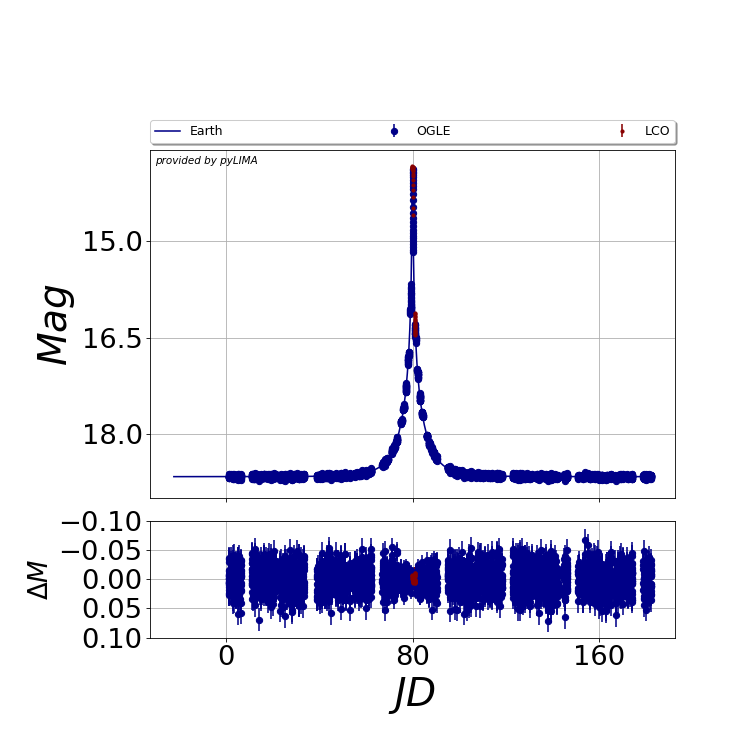

In [23]:
plt.close('all')
from pyLIMA.outputs import pyLIMA_plots
pyLIMA_plots.plot_lightcurves(fspl,result.x)
plt.show()